In [ ]:
#----------------------step 1: import the libraries ----------------------------------------
import numpy as np   #  used for numerical
import pandas as pd # used for handling the data
import matplotlib.pyplot as plt # used for visualization
import seaborn as sns # used for better representation of graphs
from sklearn.model_selection import train_test_split # to split dataset into training and testing sets
from sklearn.preprocessing import StandardScaler, LabelEncoder # StrandardScaler converts mean to 0 and standard deviation to 1. we use it because if we not then the values with larger numbers will cause biased results. LableEncoder is used to convert categorial data into numerical format
from sklearn.ensemble import RandomForestClassifier   # importing the model
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score  # for model evaluation
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC # support vactor classifer model
from sklearn.neighbors import KNeighborsClassifier  # K nearest neighbor
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier # multiple layer percepton

In [ ]:
#-------------step 2: load the database------------------------
df=pd.read_csv("/content/WA_Fn-UseC_-Telco-Customer-Churn.csv")
print(df.head())

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

In [ ]:
#----------------------step 3: explore the data------------
print(df.info())   # to check missing values
print(df.describe())  # for statical summery like mean, minimum, standar deviation, first quartile, secon quartile and third quartile
print(df.isnull().sum())   # checking missing values in each columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


<ipython-input-6-874297808831>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churn', data=df, palette='coolwarm') # countplot shows the count of each observation


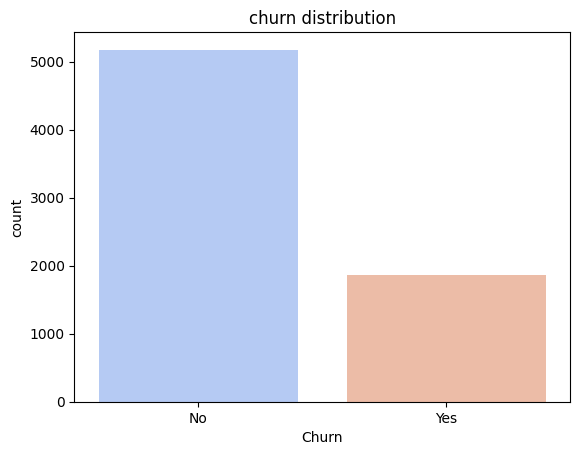

In [ ]:
# ----------------------step 4: visualization distribution----------------
sns.countplot(x='Churn', data=df, palette='coolwarm') # countplot shows the count of each observation
plt.title('churn distribution')
plt.show()

In [ ]:
# -------------------- step 5: data preprocessing-----------------------
le= LabelEncoder()
df['gender']=le.fit_transform(df['gender'])  # covets the male, female into 0,1 ( conveting categorial data into numerical)
df['Partner']=le.fit_transform(df['Partner'])
df["Dependents"]=le.fit_transform(df["Dependents"])
df["PhoneService"]=le.fit_transform(df["PhoneService"])
df["PaperlessBilling"]=le.fit_transform(df["PaperlessBilling"])
df["MultipleLines"]=df["MultipleLines"].replace({"Yes":1, "No":0, "No phone service":0})   # in the MultipleLines columns we rows with Yes, No, No phone service so we converted it to numerical data
df["OnlineSecurity"]=df["OnlineSecurity"].replace({"Yes":1,"No":0, "No internet service":0})
df["OnlineBackup"]=df["OnlineBackup"].replace({"Yes":1, "No":0, "No internet service":0})
df["DeviceProtection"]=df["DeviceProtection"].replace({"Yes":1, "No":0, "No internet service":0})
df["TechSupport"]=df["TechSupport"].replace({"Yes":1, "No":0, "No internet service": 0})
df["StreamingTV"]=df["StreamingTV"].replace({"Yes":1, "No":0, "No internet service":0})
df["StreamingMovies"]=df["StreamingMovies"].replace({"Yes":1, "No":0, "No internet service":0})


#for multiple categorial colum using one hot encoding
if 'Contract' in df.columns and 'PaymentMethod' in df.columns:
  df=pd.get_dummies(df, columns=['Contract', 'PaymentMethod'], drop_first=True)
else:
  print("Columns 'Contract' or 'PaymentMethod' not found in the DataFrame")
# to handle the missing values
numeric_df=df.select_dtypes(include=np.number)
df.fillna(numeric_df.mean(), inplace=True)   # used inplace=True as now it will add the mean values in the original dataframe and won't create new dataframe

# feature selection
x=df[['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']]
y=df["Churn"]

# feature Scaling by StanderdScaler
scaler=StandardScaler()
scaler.fit_transform(x)




<ipython-input-7-ef0584a27246>:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["MultipleLines"]=df["MultipleLines"].replace({"Yes":1, "No":0, "No phone service":0})   # in the MultipleLines columns we rows with Yes, No, No phone service so we converted it to numerical data
<ipython-input-7-ef0584a27246>:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["OnlineSecurity"]=df["OnlineSecurity"].replace({"Yes":1,"No":0, "No internet service":0})
<ipython-input-7-ef0584a27246>:10: FutureWarning: Downcasting behavior in `replace` i

array([[-1.00955867,  1.03453023, -0.65401193, ..., -0.63943864,
        -0.79013171, -0.79607014],
       [ 0.99053183, -0.96662231, -0.65401193, ..., -0.63943864,
        -0.79013171, -0.79607014],
       [ 0.99053183, -0.96662231, -0.65401193, ..., -0.63943864,
        -0.79013171, -0.79607014],
       ...,
       [-1.00955867,  1.03453023,  1.5290241 , ..., -0.63943864,
        -0.79013171, -0.79607014],
       [ 0.99053183,  1.03453023, -0.65401193, ..., -0.63943864,
        -0.79013171, -0.79607014],
       [ 0.99053183, -0.96662231, -0.65401193, ...,  1.56387171,
         1.26561178,  1.25617071]])

In [10]:
# -----------------------step 6: split data into test and train---------------
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2, random_state=42)



In [8]:
# ------------------------step 7: train model------------------------------

models={
    "Random Forest": RandomForestClassifier(n_estimators=2000, random_state=42),
    "Logistic Regression": LogisticRegression(random_state=42),
    "Decison Tree": DecisionTreeClassifier(random_state=42),
    "Support Vector Machine": SVC(probability=True, random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "Neural Network": MLPClassifier(random_state=42, max_iter=500)
}


Random Forest Model Accuracy: 0.73
Classification report for Random Forest:               precision    recall  f1-score   support

          No       0.78      0.89      0.83      1036
         Yes       0.49      0.29      0.37       373

    accuracy                           0.73      1409
   macro avg       0.63      0.59      0.60      1409
weighted avg       0.70      0.73      0.71      1409



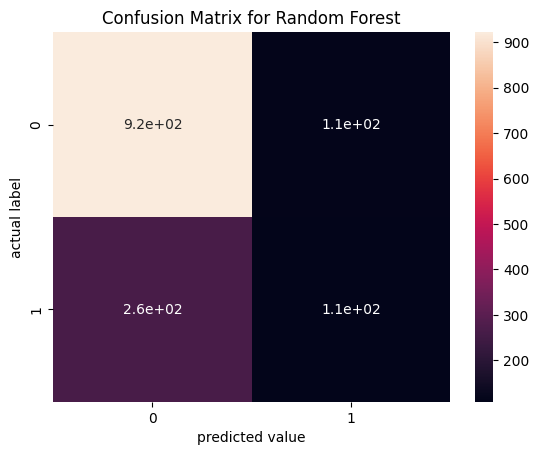

Model Score: 0.7317246273953159


Logistic Regression Model Accuracy: 0.75
Classification report for Logistic Regression:               precision    recall  f1-score   support

          No       0.77      0.96      0.85      1036
         Yes       0.61      0.19      0.29       373

    accuracy                           0.75      1409
   macro avg       0.69      0.57      0.57      1409
weighted avg       0.73      0.75      0.70      1409



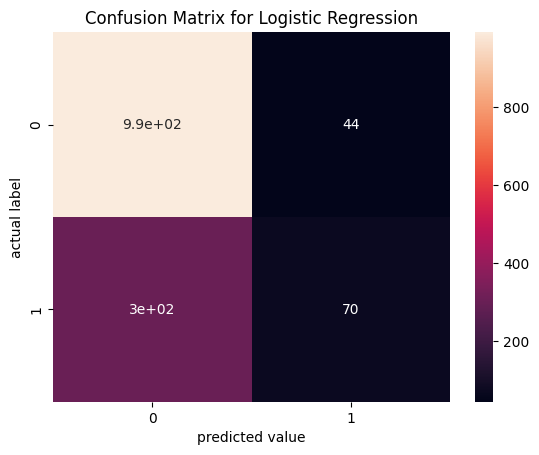

Model Score: 0.7537260468417317


Decison Tree Model Accuracy: 0.73
Classification report for Decison Tree:               precision    recall  f1-score   support

          No       0.77      0.90      0.83      1036
         Yes       0.49      0.27      0.35       373

    accuracy                           0.73      1409
   macro avg       0.63      0.59      0.59      1409
weighted avg       0.70      0.73      0.70      1409



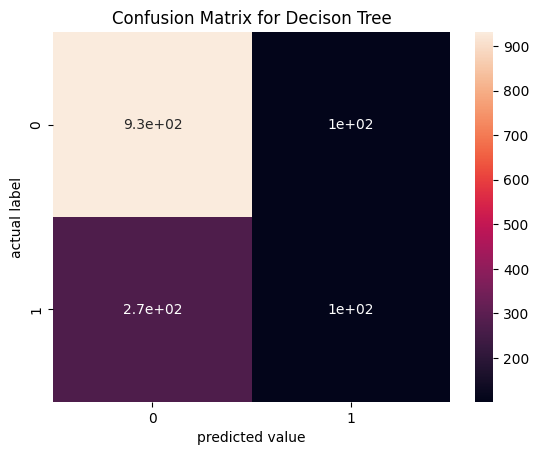

Model Score: 0.7331440738112136


Support Vector Machine Model Accuracy: 0.76
Classification report for Support Vector Machine:               precision    recall  f1-score   support

          No       0.77      0.96      0.85      1036
         Yes       0.65      0.21      0.32       373

    accuracy                           0.76      1409
   macro avg       0.71      0.59      0.59      1409
weighted avg       0.74      0.76      0.71      1409



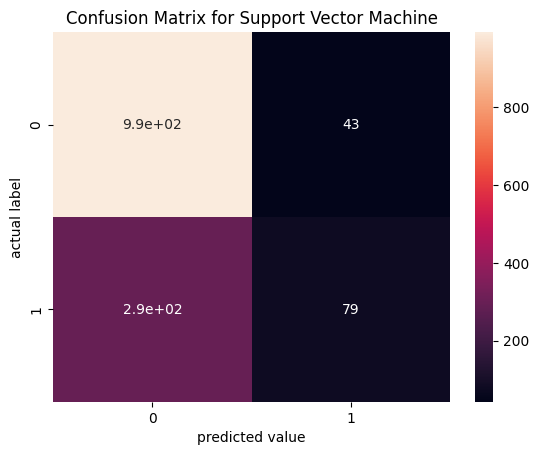

Model Score: 0.7608232789212207


K-Nearest Neighbors Model Accuracy: 0.73
Classification report for K-Nearest Neighbors:               precision    recall  f1-score   support

          No       0.78      0.87      0.83      1036
         Yes       0.48      0.32      0.39       373

    accuracy                           0.73      1409
   macro avg       0.63      0.60      0.61      1409
weighted avg       0.70      0.73      0.71      1409



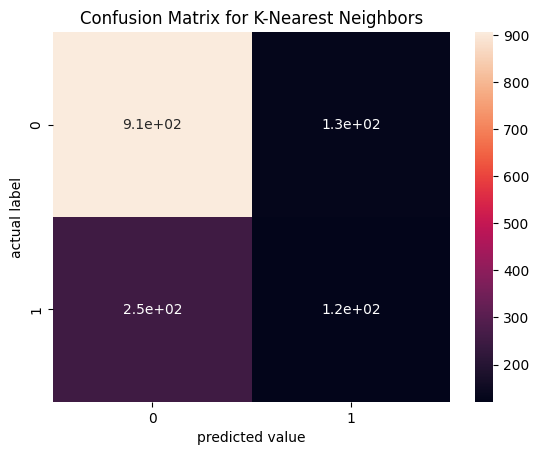

Model Score: 0.7288857345635202


Naive Bayes Model Accuracy: 0.72
Classification report for Naive Bayes:               precision    recall  f1-score   support

          No       0.80      0.83      0.81      1036
         Yes       0.48      0.44      0.46       373

    accuracy                           0.72      1409
   macro avg       0.64      0.63      0.64      1409
weighted avg       0.72      0.72      0.72      1409



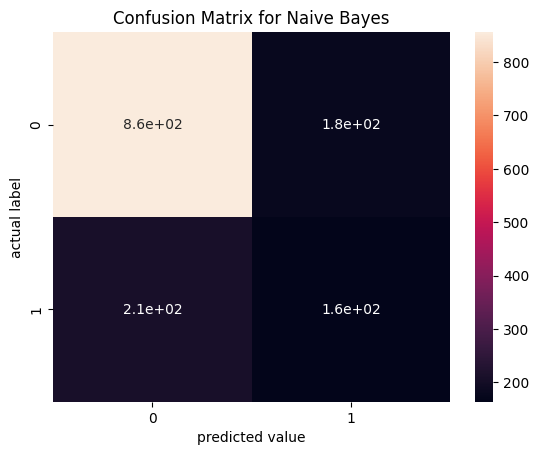

Model Score: 0.7239176721078779


Neural Network Model Accuracy: 0.75
Classification report for Neural Network:               precision    recall  f1-score   support

          No       0.79      0.90      0.84      1036
         Yes       0.54      0.32      0.41       373

    accuracy                           0.75      1409
   macro avg       0.67      0.61      0.62      1409
weighted avg       0.72      0.75      0.73      1409



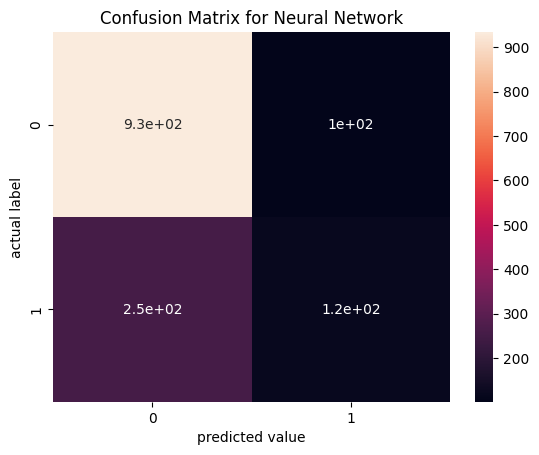

Model Score: 0.7487579843860894




In [12]:
# ---------------------step 8: make prediction ------------------

for  model_name, model in models.items():
  model.fit(x_train, y_train)
  y_predict=model.predict(x_test)
  accuracy=accuracy_score(y_test, y_predict)
  print(f"{model_name} Model Accuracy: {accuracy:.2f}")
  print(f"Classification report for {model_name}:", classification_report(y_test, y_predict))
  ConfusionMatrix= confusion_matrix(y_test, y_predict)
  sns.heatmap(ConfusionMatrix, annot=True)
  plt.xlabel("predicted value")
  plt.ylabel("actual label")
  plt.title(f"Confusion Matrix for {model_name}")
  plt.show()
  auc=roc_auc_score(y_test, model.predict_proba(x_test)[:,1]) if hasattr(model, "predicted_proba") else None # roc_auc curve measures the ability to distinguishing the difference between the positive class and negative class, not all classifier models can provide roc auc curve. if hasattr(model, "predict_proba") helps in making the auc roc curves for the models that can provide them
  if auc is not None:
    print(f"AUC for {model_name}: {auc:.2f}")
  print("Model Score:", model.score(x_test, y_test))
  print("\n"+"="*50+"\n")  # just for better visualization
